# Demo notebook for Jupyter - openBIS integration
This notebook demonstrates how we can connect to the openBIS server, download some data, analyze the data and then save the results in openBIS.

First, use the `configure openBIS connection` button in the toolbar, to connect to your openBIS server. When the connection has been selected, download the dataset in experiment `/DEFAULT/JUPYTER-DEMO/JUPYTER-DEMO_EXP_1` via the `Download openBIS dataset` button.

### Import required modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.morphology import reconstruction, remove_small_objects
from skimage.measure import label, regionprops

%matplotlib inline

### Read and display the data

In [2]:
img = imread('./20190416155247870-52/original/blobs.tif')

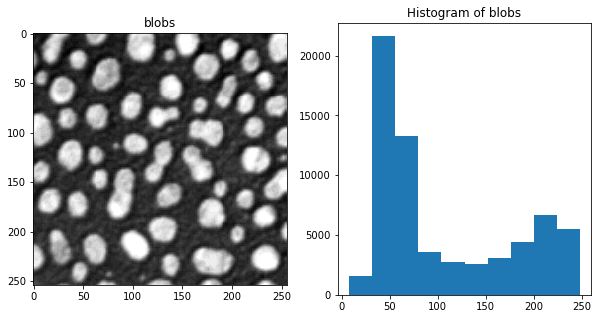

In [3]:
fig = plt.figure(figsize=(10,5))
fig.add_subplot(121)
plt.imshow(img, cmap='gray')
plt.title('blobs')
fig.add_subplot(122)
plt.hist(img.ravel(), bins=10)
plt.title('Histogram of blobs')
plt.show()

### Process the data
Let's say our analysis task is to segement the white blobs from the dark background. We will first set a threshold to binarize the image. Then we perform some further image processing to refine the results. Finally, we label the segmented blobs and measure their size. 

In [4]:
intensity_threshold = 150
binary = img > intensity_threshold

Text(0.5, 1.0, 'Binary image')

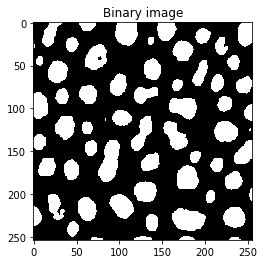

In [5]:
plt.imshow(binary, cmap='gray')
plt.title('Binary image')

Fill the small holes in the white blobs.

In [6]:
seed = np.copy(binary)
seed[1:-1, 1:-1] = binary.max()
filled = reconstruction(seed, binary, method='erosion')

Text(0.5, 1.0, 'Filled image')

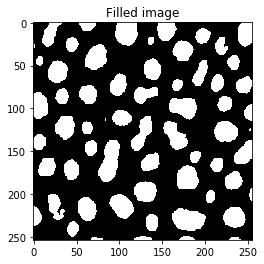

In [7]:
plt.imshow(filled, cmap='gray')
plt.title('Filled image')

Remove some small, spurious blobs.

In [8]:
removed_small = remove_small_objects(filled.astype(bool), min_size=20)

Text(0.5, 1.0, 'Small objects removed')

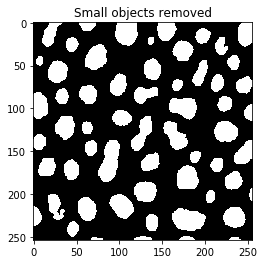

In [9]:
plt.imshow(removed_small, cmap='gray')
plt.title('Small objects removed')

Label the objects found.

In [10]:
label_img = label(removed_small, connectivity=img.ndim)

Text(0.5, 1.0, 'Labeled image')

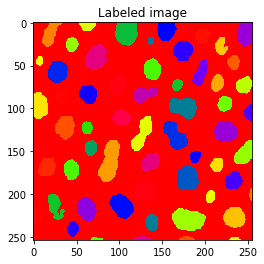

In [11]:
plt.imshow(label_img*10, cmap='prism')
plt.title('Labeled image')

Get properties of the detected objects.

In [12]:
props = regionprops(label_img)
area = np.array([x.area for x in props])

In [13]:
print('Found %d blobs.' % (len(area)))
print('Area min: %1.0f pixels' % (np.min(area)))
print('Area max: %1.0f pixels' % (np.max(area)))
print('Area mean: %1.0f pixels' % (np.mean(area)))

Found 59 blobs.
Area min: 34 pixels
Area max: 820 pixels
Area mean: 333 pixels


Now we can upload the notebook back to openBIS using the `Upload notebook and data` button in the toolbar.